Hypothesis 1 - Bots may exhibit different temporal dynamics in terms of when they are active compared to genuine users. They may also post at certain times or post a lot of tweets within a short time period.

In [2]:
import numpy as np
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/amiism/DSA4263/main/data/TweetsData/final_dataset_combined.csv'
df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [4]:
df1.head()

,id,text,source,user_id,truncated,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,retweeted_status_id,geo,...,retweeted,possibly_sensitive,num_hashtags,num_urls,num_mentions,created_at,timestamp,crawled_at,updated,IsBot
0,532627591686275072,I Pooh - In silenzio 1968 http://t.co/ahvQxUqTws,"<a href=""http://www.facebook.com/twitter"" rel=...",24858289.0,NaN,0.0,0.0,NaN,0.0,NaN,...,NaN,NaN,0.0,1.0,0.0,Wed Nov 12 20:14:48 +0000 2014,2014-11-12 21:14:48,2014-11-12 21:44:09,2014-11-12 21:44:09,1
1,532624255058706432,http://t.co/HyI5EQKz6Q,"<a href=""http://www.facebook.com/twitter"" rel=...",24858289.0,NaN,0.0,0.0,NaN,0.0,NaN,...,NaN,NaN,0.0,1.0,0.0,Wed Nov 12 20:01:32 +0000 2014,2014-11-12 21:01:32,2014-11-12 21:44:09,2014-11-12 21:44:09,1
2,532513524460052480,"Tutti a tavola, con il filetto di baccalà. htt...","<a href=""http://www.facebook.com/twitter"" rel=...",24858289.0,NaN,0.0,0.0,NaN,0.0,NaN,...,NaN,NaN,0.0,1.0,0.0,Wed Nov 12 12:41:32 +0000 2014,2014-11-12 13:41:32,2014-11-12 21:44:09,2014-11-12 21:44:09,1
3,532297646669852672,http://t.co/NAHQ4l2pUy,"<a href=""http://www.facebook.com/twitter"" rel=...",24858289.0,NaN,0.0,0.0,NaN,0.0,NaN,...,NaN,NaN,0.0,1.0,0.0,Tue Nov 11 22:23:43 +0000 2014,2014-11-11 23:23:43,2014-11-12 21:44:09,2014-11-12 21:44:09,1
4,532295960807100416,Gold - Spandau Ballet http://t.co/o8ZJHt7Neu,"<a href=""http://www.facebook.com/twitter"" rel=...",24858289.0,NaN,0.0,0.0,NaN,0.0,NaN,...,NaN,NaN,0.0,1.0,0.0,Tue Nov 11 22:17:01 +0000 2014,2014-11-11 23:17:01,2014-11-12 21:44:09,2014-11-12 21:44:09,1


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       60000 non-null  int64  
 1   text                     59970 non-null  object 
 2   source                   60000 non-null  object 
 3   user_id                  60000 non-null  float64
 4   truncated                0 non-null      float64
 5   in_reply_to_status_id    60000 non-null  float64
 6   in_reply_to_user_id      60000 non-null  float64
 7   in_reply_to_screen_name  14185 non-null  object 
 8   retweeted_status_id      60000 non-null  float64
 9   geo                      0 non-null      float64
 10  place                    6089 non-null   object 
 11  contributors             0 non-null      float64
 12  retweet_count            60000 non-null  float64
 13  reply_count              60000 non-null  float64
 14  favorite_count        

In [6]:
# Filter the DataFrame based on the IsBot feature
bot_data = df1[df1['IsBot'] == 1]

# Display information about the filtered data
print("Info about bot data:")
print(bot_data.info())


Info about bot data:
<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       30000 non-null  int64  
 1   text                     29981 non-null  object 
 2   source                   30000 non-null  object 
 3   user_id                  30000 non-null  float64
 4   truncated                0 non-null      float64
 5   in_reply_to_status_id    30000 non-null  float64
 6   in_reply_to_user_id      30000 non-null  float64
 7   in_reply_to_screen_name  2453 non-null   object 
 8   retweeted_status_id      30000 non-null  float64
 9   geo                      0 non-null      float64
 10  place                    1114 non-null   object 
 11  contributors             0 non-null      float64
 12  retweet_count            30000 non-null  float64
 13  reply_count              30000 non-null  float64
 14  favori

In [7]:
# Drop columns with zero non-null elements
df2 = df1.dropna(axis=1, how='all')

# Display the cleaned DataFrame
#print(df2)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       60000 non-null  int64  
 1   text                     59970 non-null  object 
 2   source                   60000 non-null  object 
 3   user_id                  60000 non-null  float64
 4   in_reply_to_status_id    60000 non-null  float64
 5   in_reply_to_user_id      60000 non-null  float64
 6   in_reply_to_screen_name  14185 non-null  object 
 7   retweeted_status_id      60000 non-null  float64
 8   place                    6089 non-null   object 
 9   retweet_count            60000 non-null  float64
 10  reply_count              60000 non-null  float64
 11  favorite_count           60000 non-null  float64
 12  possibly_sensitive       1753 non-null   float64
 13  num_hashtags             60000 non-null  float64
 14  num_urls              

In [8]:
df2.drop(columns=['possibly_sensitive', 'place'], inplace=True)


<ipython-input-8-7be623612777>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns=['possibly_sensitive', 'place'], inplace=True)


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       60000 non-null  int64  
 1   text                     59970 non-null  object 
 2   source                   60000 non-null  object 
 3   user_id                  60000 non-null  float64
 4   in_reply_to_status_id    60000 non-null  float64
 5   in_reply_to_user_id      60000 non-null  float64
 6   in_reply_to_screen_name  14185 non-null  object 
 7   retweeted_status_id      60000 non-null  float64
 8   retweet_count            60000 non-null  float64
 9   reply_count              60000 non-null  float64
 10  favorite_count           60000 non-null  float64
 11  num_hashtags             60000 non-null  float64
 12  num_urls                 60000 non-null  float64
 13  num_mentions             60000 non-null  float64
 14  created_at            

In [10]:
# Set display options to show full width of columns
pd.set_option('display.max_colwidth', None)

# Display the head of each column
for column in df2.columns:
    print(df2[column].head(10))

0    532627591686275072
1    532624255058706432
2    532513524460052480
3    532297646669852672
4    532295960807100416
5    531892406275543040
6    531892384221908992
7    531564612995788800
8    531205051705212928
9    531204847358713857
Name: id, dtype: int64
0                                    I Pooh - In silenzio 1968 http://t.co/ahvQxUqTws
1                                                              http://t.co/HyI5EQKz6Q
2                   Tutti a tavola, con il filetto di baccalà. http://t.co/aHHbFXJbIS
3                                                              http://t.co/NAHQ4l2pUy
4                                        Gold - Spandau Ballet http://t.co/o8ZJHt7Neu
5    Le grandi varianti regionali di un pesce chiamato baccalà http://t.co/qTe0I9IzU5
6                                                              http://t.co/5zjKTwsLST
7                                                              http://t.co/dNkWiNfA16
8                 Ruggero de I Timidi - Padre e F

In [11]:
# Find unique values and their occurrences for 'retweeted_status_id' column
unique_values_occurrences = df2['retweeted_status_id'].value_counts()

# Display unique values and their occurrences
print("Unique values and their occurrences for 'retweeted_status_id':")
print(unique_values_occurrences)


Unique values and their occurrences for 'retweeted_status_id':
retweeted_status_id
0.000000e+00    53425
4.749714e+17        2
5.695008e+17        2
5.873363e+17        2
4.999890e+17        2
                ...  
5.657365e+17        1
5.659807e+17        1
5.662553e+17        1
5.663450e+17        1
5.518018e+17        1
Name: count, Length: 6569, dtype: int64


In [12]:
# Find unique values and their occurrences for 'in_reply_to_status_id' column
unique_values_occurrences = df2['in_reply_to_status_id'].value_counts()

# Display unique values and their occurrences
print("Unique values and their occurrences for 'in_reply_to_status_id':")
print(unique_values_occurrences)


Unique values and their occurrences for 'in_reply_to_status_id':
in_reply_to_status_id
0.000000e+00    46924
5.762007e+17       19
5.624351e+17       17
5.795591e+17       12
5.699783e+17        9
                ...  
5.712070e+17        1
5.712056e+17        1
5.712045e+17        1
5.711964e+17        1
5.517968e+17        1
Name: count, Length: 11778, dtype: int64


In [13]:
# Find unique values and their occurrences for 'in_reply_to_user_id ' column
unique_values_occurrences = df2['in_reply_to_user_id'].value_counts()

# Display unique values and their occurrences
print("Unique values and their occurrences for 'in_reply_to_user_id':")
print(unique_values_occurrences)

Unique values and their occurrences for 'in_reply_to_user_id':
in_reply_to_user_id
0.000000e+00    45815
1.830132e+08      326
1.785611e+07      319
4.131663e+07      248
9.127572e+08      166
                ...  
2.244305e+08        1
2.377580e+09        1
8.293906e+07        1
1.870847e+07        1
4.895623e+07        1
Name: count, Length: 3290, dtype: int64


In [14]:
#As seen from above in_reply_to_user_id, in_reply_to_status_id, retweeted_status_id are nonsensical. So dropping those columns
df2.drop(columns=['in_reply_to_user_id', 'in_reply_to_status_id', 'retweeted_status_id'], inplace=True)


<ipython-input-14-fa86732d85d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns=['in_reply_to_user_id', 'in_reply_to_status_id', 'retweeted_status_id'], inplace=True)


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       60000 non-null  int64  
 1   text                     59970 non-null  object 
 2   source                   60000 non-null  object 
 3   user_id                  60000 non-null  float64
 4   in_reply_to_screen_name  14185 non-null  object 
 5   retweet_count            60000 non-null  float64
 6   reply_count              60000 non-null  float64
 7   favorite_count           60000 non-null  float64
 8   num_hashtags             60000 non-null  float64
 9   num_urls                 60000 non-null  float64
 10  num_mentions             60000 non-null  float64
 11  created_at               60000 non-null  object 
 12  timestamp                60000 non-null  object 
 13  crawled_at               60000 non-null  object 
 14  updated               

<ipython-input-25-27a83ea1eb4c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['timestamp'] = pd.to_datetime(df2['timestamp'])


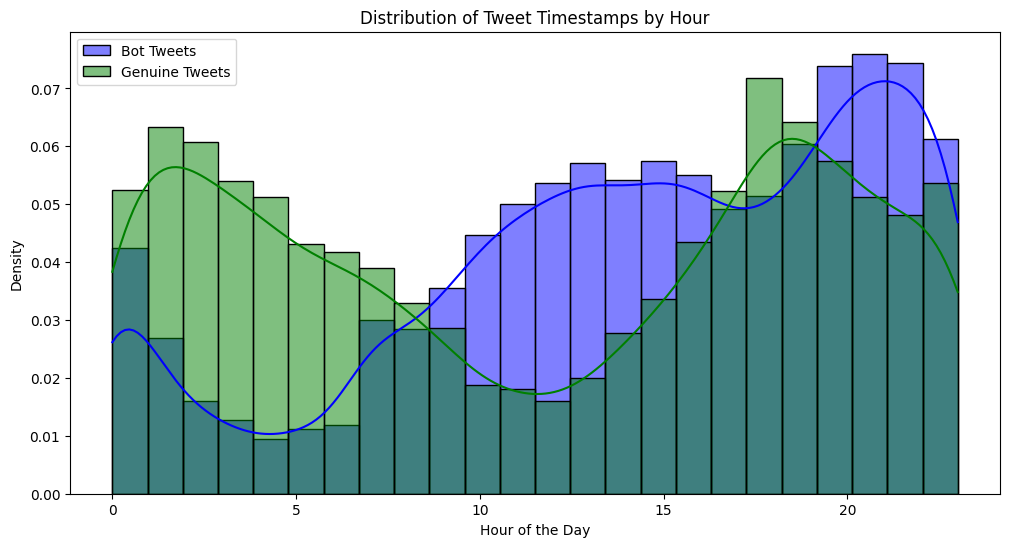

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'timestamp' column to datetime format
df2['timestamp'] = pd.to_datetime(df2['timestamp'])

# Separate data for bot and genuine accounts
bot_tweets = df2[df2['IsBot'] == 1]
genuine_tweets = df2[df2['IsBot'] == 0]

# Plotting
plt.figure(figsize=(12, 6))
sns.histplot(bot_tweets['timestamp'].dt.hour, bins=24, color='blue', label='Bot Tweets', kde=True, stat='density')
sns.histplot(genuine_tweets['timestamp'].dt.hour, bins=24, color='green', label='Genuine Tweets', kde=True, stat='density')
plt.title('Distribution of Tweet Timestamps by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Density')
plt.legend()
plt.show()


<ipython-input-26-a0b5c663a23a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['timestamp'] = pd.to_datetime(df2['timestamp'])


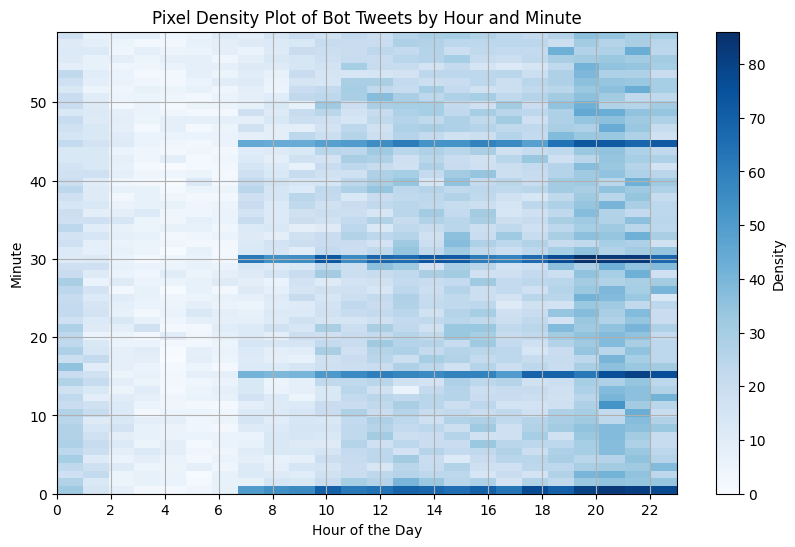

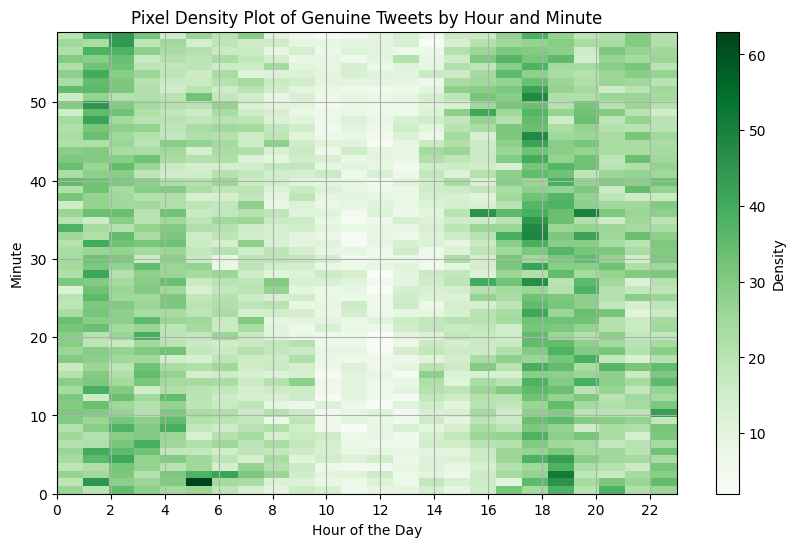

In [26]:
# Convert 'timestamp' column to datetime format
df2['timestamp'] = pd.to_datetime(df2['timestamp'])

# Separate data for bot and genuine accounts
bot_tweets = df2[df2['IsBot'] == 1]
genuine_tweets = df2[df2['IsBot'] == 0]

# Plotting for bot tweets
plt.figure(figsize=(10, 6))
plt.hist2d(bot_tweets['timestamp'].dt.hour, bot_tweets['timestamp'].dt.minute, bins=[24, 60], cmap='Blues')
plt.colorbar(label='Density')
plt.title('Pixel Density Plot of Bot Tweets by Hour and Minute')
plt.xlabel('Hour of the Day')
plt.ylabel('Minute')
plt.xticks(np.arange(0, 24, 2))
plt.yticks(np.arange(0, 60, 10))
plt.grid(True)
plt.show()

# Plotting for genuine tweets
plt.figure(figsize=(10, 6))
plt.hist2d(genuine_tweets['timestamp'].dt.hour, genuine_tweets['timestamp'].dt.minute, bins=[24, 60], cmap='Greens')
plt.colorbar(label='Density')
plt.title('Pixel Density Plot of Genuine Tweets by Hour and Minute')
plt.xlabel('Hour of the Day')
plt.ylabel('Minute')
plt.xticks(np.arange(0, 24, 2))
plt.yticks(np.arange(0, 60, 10))
plt.grid(True)
plt.show()


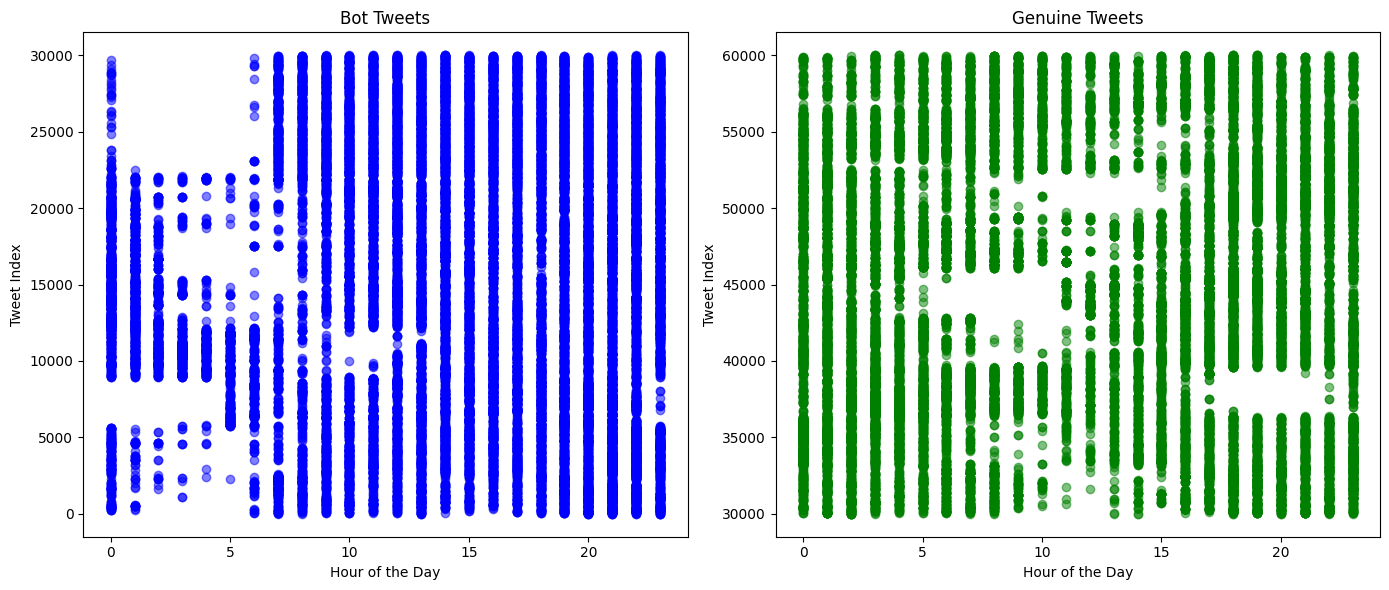

In [28]:
import matplotlib.pyplot as plt

# Separate data for bot and genuine accounts
bot_tweets = df2[df2['IsBot'] == 1]
genuine_tweets = df2[df2['IsBot'] == 0]

# Plotting
plt.figure(figsize=(14, 6))

# Bot tweets scatter plot
plt.subplot(1, 2, 1)
plt.scatter(bot_tweets['timestamp'].dt.hour, bot_tweets.index, color='blue', alpha=0.5)
plt.title('Bot Tweets')
plt.xlabel('Hour of the Day')
plt.ylabel('Tweet Index')

# Genuine tweets scatter plot
plt.subplot(1, 2, 2)
plt.scatter(genuine_tweets['timestamp'].dt.hour, genuine_tweets.index, color='green', alpha=0.5)
plt.title('Genuine Tweets')
plt.xlabel('Hour of the Day')
plt.ylabel('Tweet Index')

plt.tight_layout()
plt.show()
